# Health Information Systems and Decision Support Systems
## WPO 3: Data-driven systems 1: Regression  (01/03/24)
***
*Jakub Ceranka, Joris Wuts, Jef Vandemeulebroucke* <br>
*Department of Electronics and Informatics (ETRO)* <br>
*Vrije Universiteit Brussel, Pleinlaan 2, B-1050 Brussels, Belgium*

<font color=blue>Aline Jacquart - 0567936 <br>
                 César Zapata - 0596811</font>

***
### Goal
The goal of this practical session is to get an insight into logistic regression modelling using real life medical data from patients infected with COVID-19. Your tasks will involve building different models to predict disease severity and analyze the relations between different variables and severity risk. Students must send their notebook using the Assignment functionality in Canvas before the __7th of March, 2023, 23:59. Remember to include the HTML format!__ The grade from this practical session will contribute to your final grade.
Questions: on the discusion channel on canvas
***
In this practical session you will predict the severity of the COVID-19 outcome, based on the analysis of patient information and the corresponding computed tomography (CT) images features of COVID-19 suspects and actual patients suffering from COVID-19.
***
#### COVID features dataset
Have a look at the provided COVID datasheet (*COVID_data.csv*) with multiple features describing various COVID patients and suspects. The dataset consist of 2000 data points with multiple features, each datapoint representing an actual COVID-patient or a COVID-suspect.

The contents of the feaures provide the following information:
*   *PatientID*: ID of the patient
*   *Age*: Age of the patient categorized into one of 6 categories to limit the risk of deanonimization.
*   *Sex*: M or F - patient gender
*   *Covid*: Indicates whether the patient had a confirmed COVID infection
*   *Severity*: For COVID patients, indicates whether the disease was severe (need for intubation or caused patient death)
*   *Image_size* and *Spacing* are CT image parameters used for imaging
*   *GGO*: Proportion of the lung with GGO. Ground glass opacity (*GGO*) refers to the hazy gray areas that can show up in CT scans or X-rays of the lungs. These gray areas indicate increased density inside the lungs. The term comes from a technique in glassmaking during which the surface of the glass is blasted by sand.
*   *Consolidation*: Proportion of the lung with consolidated lessions. A pulmonary consolidation is a region of normally compressible lung tissue that has filled with liquid instead of air.

Two last features (*GGO* and *Consolidation*) were extracted from CT images of patients with COVID, or suspects of having COVID, and the ratio to the total lung volume is provided.

<img src="GGO.jpeg" alt="Drawing" style="width: 600px;"/>

High-resolution CT image showing ground-glass opacities in the periphery of both lungs in a patient with COVID-19 (red arrows). The adjacent normal lung tissue with lower attenuation appears as darker areas.


### Importing packages

During this lab session you will need a couple of packages, run the following cell to import pandas, numpy, seaborn and matplotlib.

In [ ]:
%pip install statkit

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

***
## Part 1: Loading, cleaning and analyzing the data
### Task 1.1 Loading and cleaning the data
Lets read the data into the dataframe `data`.

Inspect the dataframe and drop the following columns : `Images_sizes, Spacings, PatientID`.

Your processed dataframe should have a shape of `(2000,6)`.

Please call your final dataframe `df` throughout the whole lab session, as we provide code snipets in Task 2 and 3 that assume this variable name for the dataframe.

To further use the dataframe, we need to binarize the `Sex` label. Binarize the column so that male patients have a value of 1 and females of 0. Finally, filter the dataframe so it only has COVID positive patients. After filtering you can also drop the COVID column.

Your final dataframe should be a shape of `(1205, 5)`.

In [4]:
df = pd.read_csv('COVID_data.csv')

df.drop(df.loc[:, df.columns.str.contains('Image_size')], axis=1, inplace=True)
df.drop(df.loc[:, df.columns.str.contains('Spacing')], axis=1, inplace=True)
df.drop('PatientID', axis=1, inplace=True)
print(f"\ndf shape with covid patients (+/-): {df.shape}")

df['Sex'] = (df['Sex'] == 'M') * 1 # if sex == M -> 1, else: 0 | Multiplied by 1 so it shows 1/0 instead of True/False
df = df[df['Covid'] == 1] # Selecting only covid positive patients
df.drop(columns='Covid', axis=1, inplace=True)
print(f"\ndf shape (covid+ patients only): {df.shape}")
df.head()


df shape with covid patients (+/-): (2000, 6)

df shape (covid+ patients only): (1205, 5)


,Age,Sex,Severity,GGO,Consolidation
0,65,1,0,0.097123,0.049944
5,65,0,0,0.001831,0.002305
7,65,0,0,0.107670,0.020860
9,65,1,0,0.082823,0.000371
10,35,1,0,0.036793,0.054030


***
### Task 1.2: Assess the severity of COVID-19 in function of age

Plot a histogram for the different age groups. Note, that the ages are categorical at 6 fixed values.

__Hint:__ Use seaborns `histplot`.

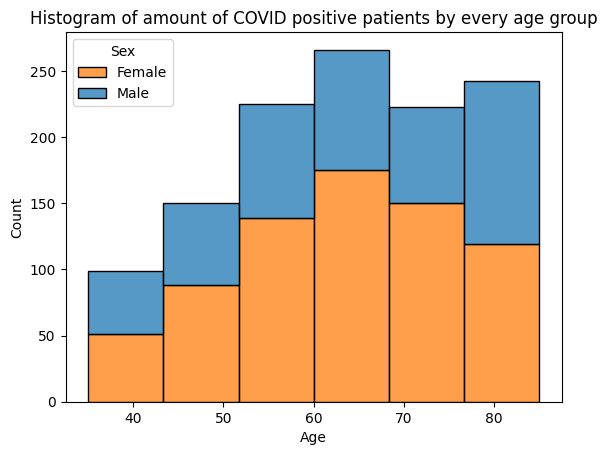

In [5]:
# histogram for every age group
sns.histplot(data=df, x='Age', hue='Sex', color='lightpink', bins=6, multiple='stack', legend=False)
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.title("Histogram of amount of COVID positive patients by every age group")
plt.show()


### Question 1.1: What can you conclude from this plots?

Answer to question 1.1: The histogram shows that there are more female than male patients positive to covid and that, at every age group. We see also a larger amount of positive patients around the age group of 60-68 years old.
The thing the histogram does not tell us is how many female and male patients took the test and their age. It also does not offer any information on the behavioral/situational differences between males and females, that can impact, for example, the number of people they have contact with in their daily life. Without this information we cannot deduct if the sex and the age influence the positive outcome of the test.

***
### Task 1.3: Checking the impact of GGO, consolidation and sex on the COVID severity

Now make similar two kde plots to assess the correlations between the `GGO`, `Consolidation` vs `Severity`.

To assess the impact of `sex`  we will use a different plot. Use a scatter plot to plot the mean fraction of severity per age group. Use 2 different colours for male and female patients.

__hint__: Split the dataframe into 2 new dataframes containing only 1 sex. Then use the groupby functionality to agregate information per age group.

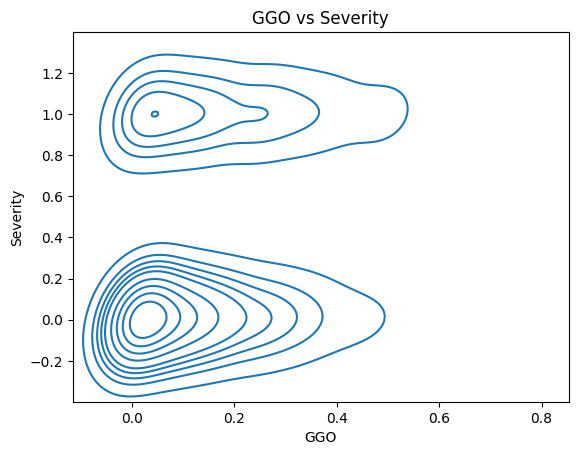

In [6]:
# GGO vs Severity plot
sns.kdeplot(data=df, x='GGO', y='Severity')
plt.title("GGO vs Severity")
plt.show()

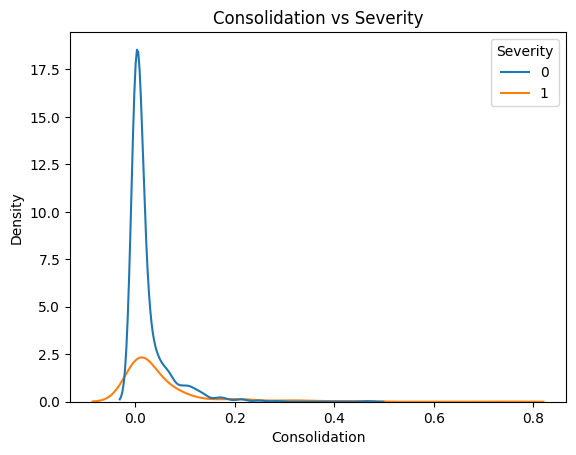

In [7]:
# Consolidation vs Severity plot
sns.kdeplot(data=df, x='Consolidation', hue='Severity')
plt.title("Consolidation vs Severity")
plt.show()

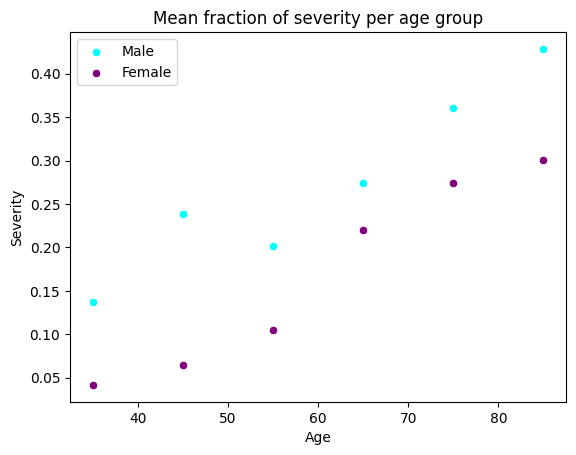

In [8]:
# Sex vs Severity plot
male_df = df[df['Sex'] == 1]
female_df = df[df['Sex'] == 0]
female = female_df.groupby(["Age"])["Severity"].mean().reset_index()
male = male_df.groupby(["Age"])["Severity"].mean().reset_index()
sns.scatterplot(male, x='Age', y='Severity', color = '#00FFFF', label='Male')
sns.scatterplot(female, x='Age', y='Severity', color = '#800080', label='Female')

plt.title("Mean fraction of severity per age group")
plt.legend()
plt.show()

### Question 1.2: What can you say about the relations of `Consolidation`, `GGO` and `Sex` with the `Severity` of COVID?

Answer to Question 1.2: The kernel density estimate plots show the distribution of severity score for different levels of GGO and consolidation.

For consolidation, we see that the peak of the distribution is lightly shifted to the left for low severity, meaning that there is a potential positive relationship between consolidation and severity (a patient with more consolidation would be expected to have a more severe covid).
The same is observed with GGO. These results don't show a difference big enough to affirm that there is a significant difference and that there positive relationships are confirmed. \\

We observe a difference in mean fraction of severity for men and women. Men have for the same age a higher severity of the disease and that for every age.
We can also observe in the last plot that the severity increases with the age for both sexes.


***
## Part 2:  Logistic regression of severity on `Age` and `Gender`

Logistic regression allows us to analyze how a set of features affects some binary target label. The weights gives us an estimation of the influence of each particular feature on the probability of the target being equal to one.

We want to model how the probability that a person develops a severe COVID disease is affected by his/her age, sex, and size lung lesions.

Let $y_i = 1$ if i-th person's develop severe symptoms.
Logistic regression models this probabilty in the following way:

\begin{equation}
p(y_i = 1 \mid \beta) = \sigma (\alpha + \beta_0 age_i + \beta_1 sex_i + \dots ),
\end{equation}

where $\sigma(t) = \frac1{1 + e^{-t}}$

We can obtain a point estimate for the intercept $\alpha$ and coefficients $\beta_k$ using *sklearn* package.


### Task 2.1: Define the logistic function

To compute probabilities with the logistic regresion, we first need to define the logistic functions. Use `numpy` and complete the code function below so it returns the logistic function $\sigma(t) = \frac1{1 + e^{-t}}$.

Test your system. The `logistic(1)` should return a value of `+- 0.731`.

In [9]:
from sklearn.linear_model import LogisticRegression

def logistic(x):
  return( 1 / (1 + np.e** (-x)))

print(logistic(1))

0.7310585786300049


### Task 2.2: Fit a logistic regresion model.
Now lets fit a logistic regression model for COVID severity. This first basic model will only consider two features. We thus have to create a feature set ```X``` by only selecting the ```age``` and ```sex``` columns of the total ```df```. Make sure that age is the first feature column during the whole lab session! Use the logistic regression model (with all default parameters) of ```scikit-learn``` to create and fit the model. Then, print the values of coefficients and the interception of the fitted model.

In [10]:
X = df[['Age', 'Sex']] #feature set
y = df['Severity']

model = LogisticRegression()
model.fit(X,y)

# Print the values of coefficients and the interception of the fitted model.
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[0.03390489 0.59227295]]
Intercept: [-3.71307422]


### Question 2.1: What do the coefficients and interceptions mean ?

Answer to Question 2.1: The coefficients and interceptions are present in the equation to determine the logistic regression model.
The coefficients (betas) characterizes the change of the model in response to the change of one feature when the other features are holded constant.
The interception (alpha) is the independent term in the linear model. It represents the baseline level of the model: when all the features are 0, that is the response of the model.

### Task 2.3: Computing severity risks with the obtained model
Now manually compute the probability of severity with the obtained coefficients. Use your own defined logistic function and the formula presented in task 2.1. Compare the probability of severe disease  of the following patients:
- 60y old male
- 50y old woman.
- 35y old male
- 40y old woman


__Hint__: Represent all features in one numpy array with shape 4 ( patients) by 2 (features). Can you re write the Formula given in task 2 as a Matrix multiplication? A matrix multiplicatoin can be performed by the '@' operation on numpy arrays, Transprosing matrixes with '.T' can also be usefull!


In [11]:
patients_features = [[60,0],[50,1],[35,0],[40,1]]

[[beta_1, beta_2]] =model.coef_

def proba(number_patients, features):
  probability = []
  for i in range(0,number_patients):
    probability.append(logistic(model.intercept_+beta_1*features[i][0] + beta_2*features[i][1]))
  return np.concatenate(probability)
proba(4, patients_features)
# "Can you re write the Formula given in task 2 as a Matrix multiplication?""
#Do we have to do it or is it good if we just find the probability?

array([0.157257  , 0.19379196, 0.07402784, 0.14621447])

### Task 2.4: Plotting severity curves
In task 1.3, you where asked to plot the mean severity for different ages per gender in a scatter plot. In task 2.3, you got probabilities of severity for specific age,sex combinations. Now print 2 curves representing the probability of having severe COVID per age for all ages between 20 and 100. On the same plot, also plot the results obtained from task 1.3.

__hint__: Manually define X

__hint__: Use np.linspace to contstruct an array of all possible ages between 20 and 100

__hint__: np.vstack can be usefull to concatenate 2 np arrays. You can use it to construct X

__hint__: Create an X matrix representing males, and a seperate X matrix for females. You can then easily plot them in different colours



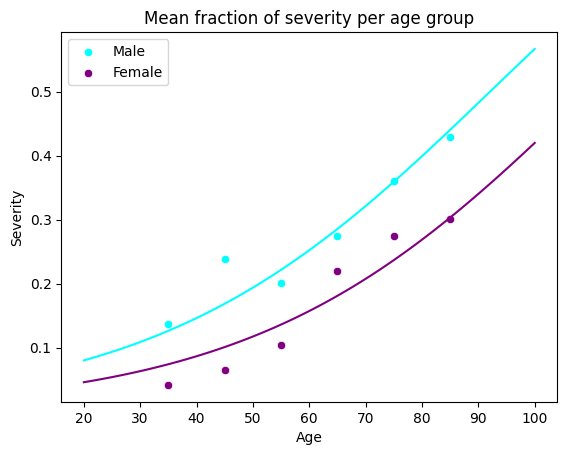

In [12]:
age = np.linspace(20,100,80)
sex_male = [1] * 80
sex_female = [0] * 80
X_male = np.vstack((age, sex_male)) #[X['Sex'] == 1]
X_female = np.vstack((age, sex_female)).T
X_male = X_male.T
probamale = proba(80, X_male)
probafemale = proba(80, X_female)

plt.plot(age, probamale, color = '#00FFFF')
plt.plot(age, probafemale, color = '#800080')
sns.scatterplot(male, x='Age', y='Severity', color = '#00FFFF', label='Male')
sns.scatterplot(female, x='Age', y='Severity', color = '#800080', label='Female')

plt.title("Mean fraction of severity per age group")
plt.legend()
plt.show()

### Question 2.2: This function does not look like a standard sigmoid function, why ? What can you say about the relation between age, gender and severity?




Answer question 2.2:
The non sigmoid look of the function can be explained by the fact that the model only looks at two features, the age and the sex, which are not enough to characterize completely the probability that a person develops a severe COVID disease. The two studied features may not have a linear relationship with severity, especially the age that has an exponential relationship with severiyt leading to a a curve different from the standard sigmoid function.

A difference in severity between the sexes can be observed but we need to draw the confidence intervals to determine the certainty of the results before affirming it.
We suppose with this graph that sex has an influence, since the male subjects have a higher mean fraction severity than the female subjects. The severity increases in an exponential way in function of the age.

# Part 3: Confidence intervals

This model already gives us a trend on the impact of COVID severity. But how certain are we on the obtained results? The confidence intervals can be obtained using the method of bootstrapping. By fitting the model 1000 times on random subsets of the dataset, we can obtain 1000 sets of coefficients and interceptions of the model that we can later analyse. We estimate the parameter for many random samples of the population and obtain an approximation of the sampling distribution of the coefficient estimate. This method is very general, as it is independent of the estimator and makes fewer assumptions than other methods.





### Task 3.1: Obtain Bootstrap results:

Fit 1000 models on random subsets of the data with replacement. every dataset sample with give you 1 set of parameters.

__hint__: Use the pandas.sample function with replacement to draw a bootstrap sample with the same size as the original df
__hint2__: Make sure that you store the coeficients and the intercepts in the lists provided by us, later you will need them to plot the confidence intervals

In [13]:
N_bs = 1000
def boot():
  coef_bs = np.zeros([2,N_bs])
  int_bs = np.zeros([1,N_bs])
  for i in range(N_bs):
    bootstrap_sample = df.sample(n=N_bs, replace=True)
    X_bootstrap = bootstrap_sample[['Age','Sex']]
    y_bootstrap = bootstrap_sample['Severity']
    model = LogisticRegression()
    model.fit(X_bootstrap, y_bootstrap)
    [[coef1, coef2]] = model.coef_
    coef_bs[0][i] = coef1
    coef_bs[1][i] = coef2
    int_bs[0][i] = model.intercept_[0]
  return coef_bs, int_bs, X_bootstrap


### 3.2: Visualization and analysis of results

The code snippit below plots confidence intervals for a bootstrapped model, Use it together with your code in task 2.4 to plot confidence interval around the obtained curves from task 2.4.

In [14]:
# This function plots confidence intervals for a set of bootstrapped intercepts and coeficients.
# You also have to provide the values on the x_axis,and a colour scheme
def plot_CI(int_bs,coef_bs,X,color):
    CI = np.percentile(logistic(int_bs.T + coef_bs.T @ X), [2.5, 97.5], axis=0)
    plt.fill_between(X[0], CI[0], CI[1], color=color, alpha=0.1)


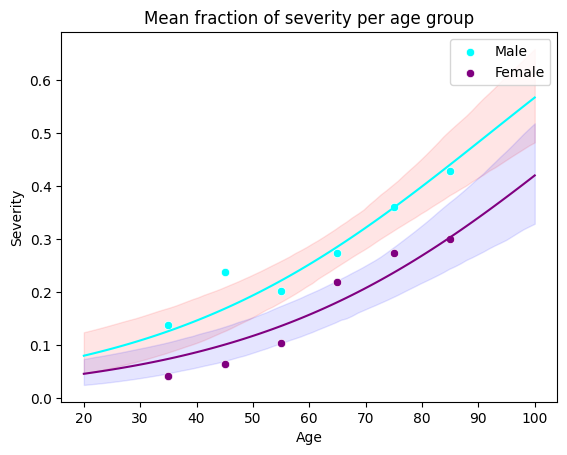

In [15]:
coef_bs_male, int_bs_male, X_bootstrap_male = boot()
plot_CI(int_bs_male,coef_bs_male, X_male.T,'red')
plot_CI(int_bs_male,coef_bs_male, X_female.T,'blue')
plt.plot(age, probamale, color = '#00FFFF')
plt.plot(age, probafemale, color = '#800080')
sns.scatterplot(male, x='Age', y='Severity', color = '#00FFFF', label='Male')
sns.scatterplot(female, x='Age', y='Severity', color = '#800080', label='Female')

plt.title("Mean fraction of severity per age group")
plt.legend()
plt.show()

### Question 3.1: What can you conclude from this graph. What does it mean that the confidence intervals don't overlap?


Answer to question 3.1:  The confidence intervals don't overlap, meaning that there is a statistically significant difference between the sexes in the severity of the COVID. \\
At some parts of the plot, the confidence intervas overlap a little bit (20-45 years old and 95-100 years old).
In the histogram drew previously, we saw that there are more women results in this study, especially in the age interval of 50-70 years old. This can explain why in this interval there is no overlap of the confidence intervals. The histogram shows that there are less patients in the range of 20-30 years old, leading to overlapping of the confidence intervals. We thus cannot determine if the confidence interval is due to no statistical difference between both sexes at this age or if it is just due to the lack of data.
The histogram shows also that there was a good amount of patient above 80 years old (same amount as for people of 60-70). The confidence intervals overlapping for this age is thus explained by the fact that there is less significant difference between both sexes in severity of COVID.




In [16]:
# Answer to question 3.1: ...

***
## Part 4: Add `GGO` and `Consolidation`  

The previous model only explored the gender and age effect. In this part, we are going to add the `GGO` and `Consolidation` to the model.

### Task 4.1.

Similar to the code provided in Part 2, retrain the model on all 4 features. Print the coefficients and intercept.

In [17]:
X_new = df[['Age', 'Sex', 'GGO', 'Consolidation']] #feature set
X_new.head()
y_new = df['Severity']

model_new = LogisticRegression()
model_new.fit(X_new, y_new)

# Print the values of coefficients and the interception of the fitted model.
print(f"Coefficients: {model_new.coef_}")
print(f"Intercept: {model_new.intercept_}")

Coefficients: [[0.03558446 0.45909285 3.39938488 3.48334911]]
Intercept: [-4.30087647]


### Question 4.1: The shape of the coefficient vector has changed, what do the values represent? Based on these values, what feature do you expect to have the highest impact on disease severity?

The shape of the coefficient vector changed given the addition of the other two features (GGO and Consolidation) to the logistic-regression model. The values present in the vector of coefficients represent the influence of each of the four features on the log-odds for developping severe covid symptoms. <br>
The relationship between the coefficients and the severity is directly proportional, meaning that when a coefficient is greater, the log-odds for covid symptoms severity also increase. <br>

Based on the obtained values, it is expected that the GGO and Consolidation features are the most significant ones for determining the severity of the symptoms. This due to them being the two highest absolute values between the coefficients.


### Task 4.2: Use the bootstrapping technique to create the confidence interval for the new model

In [19]:
N_bs = 1000
def boot_1():
  coef_bs = np.zeros([4, N_bs])
  int_bs = np.zeros([1, N_bs])
  #sex_df = df[df['Sex'] == sex]
  for i in range(N_bs):
    bootstrap_sample = df.sample(n=N_bs, replace=True)
    X_bootstrap = bootstrap_sample[['Age','Sex', 'GGO', 'Consolidation']]
    y_bootstrap = bootstrap_sample['Severity']
    model = LogisticRegression()
    model.fit(X_bootstrap, y_bootstrap)
    [[coef1, coef2, coef3, coef4]] = model.coef_
    coef_bs[0][i] = coef1
    coef_bs[1][i] = coef2
    coef_bs[2][i] = coef3
    coef_bs[3][i] = coef4
    int_bs[0][i] = model.intercept_
  return coef_bs, int_bs, X_bootstrap

### Tasks 4.3: Visualize the results of ```consolidation``` and ```GGO```:
As we now have multi-dimensional and continous data, we have to apply some tricks to plot the results.
Firstly, to reduce the dimensionality, we will only focus on males.
Secondly, a logistic regression model is a linear model, we can simply average out features.

Furthermore, ```consolidation``` and ```GGO``` are continous values. To assess their full impact, we will use the 10th and 90th percentiles. This reflects a 'High' or 'Low' value of ```consolidation``` and ```GGO```

__Hint 1:__ Create X such that you only have males.

__Hint 2:__ Set the ```GGO``` value to its mean in ```X``` when inspecting the impact of ```consolidation``` and vise versa.

__Hint 3:__ To create 2 plots, use the 10th and 90th percentile values in ```X``` for the feature of interest. (with np.percenile)

__Hint 4:__ You do not need to have the pointplots here as we do not have cathegorical data for the ```GGO``` and ```consolidation```.


<ipython-input-19-93faf879b6c6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int_bs[0][i] = model.intercept_
<ipython-input-19-93faf879b6c6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int_bs[0][i] = model.intercept_
<ipython-input-19-93faf879b6c6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int_bs[0][i] = model.intercept_
<ipython-input-19-93faf879b6c6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and wil

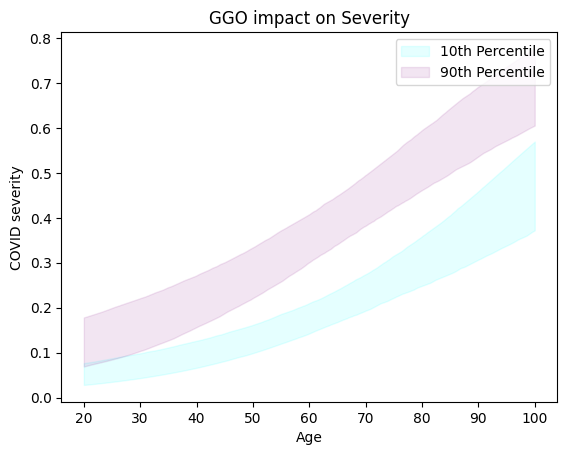

In [20]:
mean_GGO = male_df['GGO'].mean()
mean_Consolidation = male_df['Consolidation'].mean()
ages = np.linspace(20, 100, len(male_df)) # ages range from 20 to 100, with the same amont of values as there are rows in the male-only dataframe

X_Consolidation = np.vstack((ages, np.ones_like(ages), np.full_like(ages, mean_GGO), male_df['Consolidation']))
X_ggo = np.vstack((ages, np.ones_like(ages), male_df['GGO'], np.full_like(ages, mean_Consolidation)))

# getting percentiles
GGO_percentile_10 = np.percentile(df['GGO'], 10)
GGO_percentile_90 = np.percentile(df['GGO'], 90)

X_ggo_percentile_10 = np.vstack(((ages, np.ones_like(ages), np.full_like(ages, GGO_percentile_10), np.full_like(ages, mean_Consolidation))))
X_ggo_percentile_90 = np.vstack(((ages, np.ones_like(ages), np.full_like(ages, GGO_percentile_90), np.full_like(ages, mean_Consolidation))))

# bootstrapping
coef_bs_male, int_bs_male, X_bootstrap_male = boot_1()

# plotting GGO vs Severity
plot_CI(int_bs_male, coef_bs_male, X_ggo_percentile_10, color='#00FFFF')
plot_CI(int_bs_male, coef_bs_male, X_ggo_percentile_90, color='#800080')
plt.xlabel('Age')
plt.ylabel('COVID severity')
plt.title('GGO impact on Severity')
plt.legend(['10th Percentile', '90th Percentile'])
plt.show()

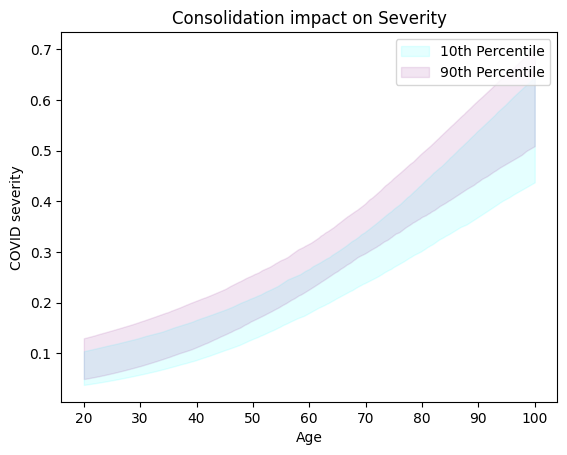

In [21]:
# getting percentiles
Consolidation_percentile_10 = np.percentile(df['Consolidation'], 10)
Consolidation_percentile_90 = np.percentile(df['Consolidation'], 90)

X_Consolidation_percentile_10 = np.vstack(((ages, np.ones_like(ages), np.full_like(ages, Consolidation_percentile_10), np.full_like(ages, mean_GGO))))
X_Consolidation_percentile_90 = np.vstack(((ages, np.ones_like(ages), np.full_like(ages, Consolidation_percentile_90), np.full_like(ages, mean_GGO))))

# plotting Consolidation vs Severity
plot_CI(int_bs_male, coef_bs_male, X_Consolidation_percentile_10, color='#00FFFF')
plot_CI(int_bs_male, coef_bs_male, X_Consolidation_percentile_90, color='#800080')
plt.xlabel('Age')
plt.ylabel('COVID severity')
plt.title('Consolidation impact on Severity')
plt.legend(['10th Percentile', '90th Percentile'])
plt.show()


### Question 4.2: What can you say on the impact on severity from `GGO` and `Consolidation`? Which one has the highest impact ?

From the information obtained before, one can observe that *Consolidation* does not appear to present a higher impact on the severity of the symptoms when the *Age* and *GGO* features are fixed. This can be concluded from the big portion that is overlapping between the 10th and 90th percentiles.

*GGO*, on the other hand, seems to have an important effect on the risk of severity of the symptoms, with some ages having a difference of almost the double of the value for the severity.

In [ ]:
# Solution
#There is no additional risk increase due to consolodiation for age and GGO fixed.

#Effect of GGO on severity risk is large, approximately 50% increase for people of 60 years old.
# This is larger than the age effect, which is lower thatn 40% in the whole range of age.

### Question 4.3: Does this insight agrees with your answer to Q3.1? Why could this happen?
__Hint:__ Have a look at the density plots you made in Part 1.

Contrasting with what was answered in question 4.1, when comparing with the density plots of part 1 of the notebook, the *Consolidation* feature is spread on a small range, not changing too much with the *severity* of the symptoms. However, there may be too few values for obtaining a significant trend/relation. The data also presents a similar amount of severe and non-severe cases that fall on a specific range of *Consolidation*, making it more difficult to differentiate it's influence on *Severity*.

In [ ]:
# Answer to Question 3.3: ...

## Part 5: Cost functions

After extracting knowledge from the data, it is time to put the logistic regression models into action.

You are working in an insurance company, and you have to advice the government what kind of financial model they should use to treat COVID-19 patients. The two options on the table are the logistic regression models trained on 2 (i.e. ```Age``` and ```Sex```) or on 4 features (i.e. ```Age```, ```Sex```, ```GGO```, ```Consolidation```).

Use decision curve analysis to investigate the 2 options.

__Hint 1:__ As you will now use the models to make predictions, it is nescacary to split your dataset in a train and test split. Use sklearn for this and use a test split of size 33%.

__Hint 2:__ First, train your logistic regression model on 2 and later on 4 features. Use ```sklearn``` function ```predict_proba()``` to get probability values for your ```X```.

__Hint 3:__ Use the ```NetBenefitDisplay``` function from the ```statkit``` package to plot the curves.



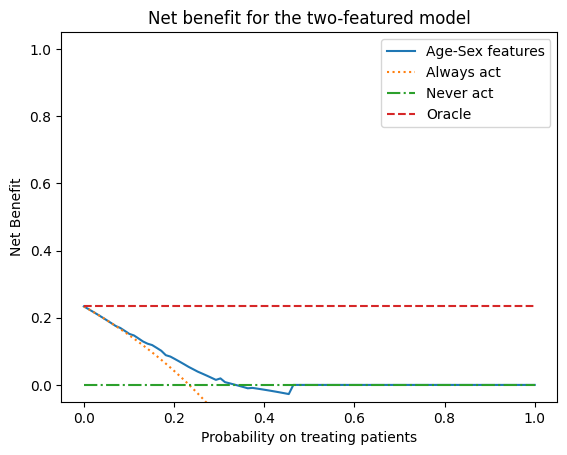

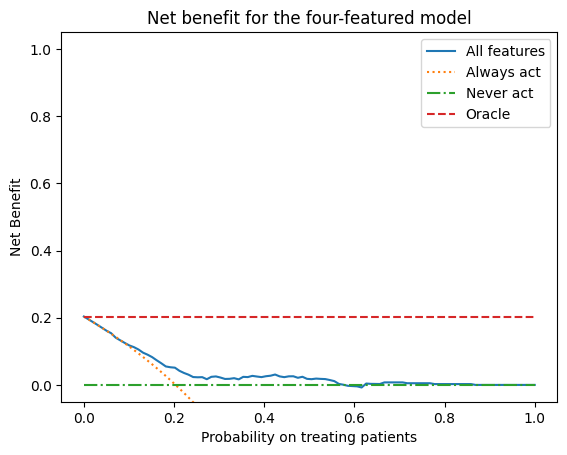

In [25]:
from sklearn.model_selection import train_test_split
from statkit.decision import NetBenefitDisplay
from statkit.decision import net_benefit

Y = df['Severity']

# model for two features: Age and Sex
X_AgeSex = df[['Age', 'Sex']]
X_train_AgeSex, X_test_AgeSex, Y_train, Y_test = train_test_split(X_AgeSex, Y, test_size=0.33)
model_AgeSex = LogisticRegression()
model_AgeSex.fit(X_train_AgeSex, Y_train)

# model for four features: Age, Sex, GGO, and Consolidation
X_All = df[['Age', 'Sex', 'GGO', 'Consolidation']]
X_train_All, X_test_All, Y_All_train, Y_All_test = train_test_split(X_All, Y, test_size=0.33)
model_All = LogisticRegression()
model_All.fit(X_train_All, Y_All_train)

probabilities_AgeSex = model_AgeSex.predict_proba(X_test_AgeSex)[:, 1]
probabilities_All = model_All.predict_proba(X_test_All)[:, 1]

net_benefit_AgeSex = net_benefit(Y_test, probabilities_AgeSex)
net_benefit_All = net_benefit(Y_All_test, probabilities_All)


# Plotting net benefit corresponding to the thresholds
net_benefit_AgeSex = NetBenefitDisplay.from_predictions(Y_test, probabilities_AgeSex, name="Age-Sex features")
plt.xlabel('Probability on treating patients')
plt.ylabel('Net Benefit')
plt.title('Net benefit for the two-featured model')
plt.legend()
plt.show()

net_benefit_All = NetBenefitDisplay.from_predictions(Y_All_test, probabilities_All, name="All features")
plt.xlabel('Probability on treating patients')
plt.ylabel('Net Benefit')
plt.title('Net benefit for the four-featured model')
plt.legend()
plt.show()

### Question 5.1: What model would you advice to use. Explain with the help of the curves

It can be observed that both models converge to zero at the end. However, the model with four features shows a rather higher net benefit compared to the two-feature model. Any model will have a negative slope on the curves, as increasing the number of patients being treated who do not really require treatment decreases the benefit of the model. It is also notable that the two-featured model presents a range of probability on treating the patients that has very clear negative values for the net benefit, while the four-featured model stays above zero for a bigger range of probability values. <br>
This implies that the addition of the *GGO* and *Consolidation* features is valuable and has an appreciable impact for the prediction of the severity of covid symptoms, and is thus the model we would advise to use.

In [ ]:
# Your answer here...